In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#한글 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

# 지역별 소득 확인

In [2]:
cost1_df = pd.read_csv('/Users/sejinmoon/Desktop/마약과 지역의 상관관계(데이터분석)/행정구역_시도_별_경제활동인구_20240522131607.csv')
cost2_df = pd.read_csv('/Users/sejinmoon/Desktop/마약과 지역의 상관관계(데이터분석)/전국 시도단위 소득정보(24.01) 3.csv')

In [3]:
cost1_df.head()

,시도별,경제활동인구(천명),취업자(천명),실업자(천명)
0,서울,5448,5252,196
1,부산,1738,1688,50
2,대구,1268,1227,41
3,인천,1742,1682,61
4,광주,809,787,22


In [4]:
cost2_df.head()

,기준년월,시도코드,시도명,평균연소득금액(천원),중위연소득금액(천원),인구수(명)
0,202401,41,경기,38215,32000,12826401
1,202401,11,서울,40234,31000,9706530
2,202401,48,경남,35435,30880,3019071
3,202401,50,제주,35180,30000,614938
4,202401,51,강원,34287,30000,1377467


In [5]:
# 인덱스를 재설정 (inplace=True 사용)
cost2_df.reset_index(drop=True, inplace=True)

#지정한 열 삭제
cost2_df.drop(['기준년월','시도코드'], axis=1, inplace = True)

#열 이름 통일
cost1_df.rename(columns = {'시도별' : '시도명'}, inplace = True)

#소득 관련 데이터프레임 하나로 합치기
cost_df = pd.merge(cost1_df, cost2_df, left_on='시도명', right_on='시도명', how='inner')
cost_df.head()

,시도명,경제활동인구(천명),취업자(천명),실업자(천명),평균연소득금액(천원),중위연소득금액(천원),인구수(명)
0,서울,5448,5252,196,40234,31000,9706530
1,부산,1738,1688,50,35123,30000,3074303
2,대구,1268,1227,41,35085,30000,2254567
3,인천,1742,1682,61,35660,31000,2807827
4,광주,809,787,22,36184,30620,1347651


In [6]:
cost_df['소득평균(천원)'] = (cost_df['평균연소득금액(천원)'] + cost_df['중위연소득금액(천원)']) / 2
cost_df.drop(['평균연소득금액(천원)', '중위연소득금액(천원)'], axis = 1, inplace = True)
cost_df.head()

,시도명,경제활동인구(천명),취업자(천명),실업자(천명),인구수(명),소득평균(천원)
0,서울,5448,5252,196,9706530,35617.0
1,부산,1738,1688,50,3074303,32561.5
2,대구,1268,1227,41,2254567,32542.5
3,인천,1742,1682,61,2807827,33330.0
4,광주,809,787,22,1347651,33402.0


# 지역별 교육 수준

In [7]:
#edu1_df : 학업중단률 및 중단사유
#edu2_df : 교육비특별회계 세입세출내역
#edu3_df : 행정구역별 학위 졸업자
edu1_df = pd.read_csv('/Users/sejinmoon/Desktop/마약과 지역의 상관관계(데이터분석)/지역규모별 학업중단률 및 중단사유.csv')
edu2_df = pd.read_csv('/Users/sejinmoon/Desktop/마약과 지역의 상관관계(데이터분석)/교육비특별회계 세입세출결산 (1).csv')
edu3_df = pd.read_csv('/Users/sejinmoon/Desktop/마약과 지역의 상관관계(데이터분석)/행정구역별 학위별 졸업자.csv')

In [8]:
edu1_df.head()

,시도,지역규모,학업중단률(%),전년도 학생수,학업중단자 계
0,서울,소계,1.5,806340,11902
1,부산,소계,0.8,299960,2496
2,대구,소계,0.8,242833,1875
3,인천,소계,0.8,306493,2582
4,광주,소계,0.8,169208,1409


In [9]:
#교육비 지출 내역
edu2_df.head()

,지역명,금액
0,서울,1927134177928
1,부산,332851491360
2,대구,189942558470
3,인천,273638677030
4,광주,157128832026


In [10]:
edu3_df.head()

,시도,졸업자,전문학사,학사,석사,박사
0,서울,195946,17689,133212,37984,7061
1,부산,45116,7557,31608,4937,1014
2,대구,28088,12647,11894,3000,547
3,인천,17371,6131,8698,2202,340
4,광주,23013,4003,15530,2754,726


In [11]:
# 열 이름 재설정
edu2_df.rename(columns = {'금액' : '교육비 투자 금액'}, inplace = True)

#열 이름 통일
edu1_df.rename(columns = {'시도' : '시도명'}, inplace = True)
edu2_df.rename(columns = {'지역명' : '시도명'}, inplace = True)
edu3_df.rename(columns = {'시도' : '시도명'}, inplace = True)

#데이터프레임 합치기
edu_df = edu1_df.merge(edu2_df, on='시도명', how='outer').merge(edu3_df, on='시도명', how='outer')
edu_df['학사 이상 비율'] = (edu_df['학사'] + edu_df['석사'] + edu_df['박사']) / edu_df['졸업자'] * 100
edu_df.drop(['졸업자', '학사', '석사', '박사'], axis = 1, inplace = True)

edu_df['학생대비 교육비 투자 비율'] = edu2_df['교육비 투자 금액'] / edu1_df['전년도 학생수'] * 1000  # 1000명당 교육비 계산


#필요없는 열 삭제
edu_df.drop(['지역규모','전년도 학생수', '학업중단률(%)', '전문학사', '교육비 투자 금액', '학업중단자 계'], axis = 1, inplace = True)

edu_df

,시도명,학사 이상 비율,학생대비 교육비 투자 비율
0,서울,90.972513,2.389977e+09
1,부산,83.249845,1.109653e+09
2,대구,54.973654,7.821942e+08
3,인천,64.705544,8.928056e+08
4,광주,82.605484,9.286135e+08
5,대전,82.103974,3.863621e+08
6,울산,71.073611,4.843076e+08
7,세종,80.376940,6.790659e+08
8,경기,61.504388,1.875883e+09
9,강원,87.371962,7.022045e+08


# 지역별 마약 발생 건수

In [12]:
drug_df = pd.read_csv('/Users/sejinmoon/Desktop/마약과 지역의 상관관계(데이터분석)/마약 범죄발생 및 검거현황.csv')
drug_df.head()

,지역,2023.4/4,2023.4/4.1,2023.4/4.2,2023.4/4.3,2023.4/4.4,2024.1/4,2024.1/4.1,2024.1/4.2,2024.1/4.3,2024.1/4.4
0,지역,발생건수 (건),검거건수 (건),발생건수대비검거건수 (%),검거인원 (명),법인체 (개),발생건수 (건),검거건수 (건),발생건수대비검거건수 (%),검거인원 (명),법인체 (개)
1,총계,3149,2968,94.3,3890,4,2070,1884,91.0,2433,3
2,강원,69,105,152.2,127,0,41,64,156.1,68,0
3,경기,627,588,205.8,851,0,502,486,199.0,590,0
4,경남,125,104,83.2,113,0,80,67,83.8,73,2


In [13]:
#최근 데이터만 반영
drug_df.columns = ['지역','발생건수', '검거건수', '발생건수대비검거건수', '검거인원', '법인체','발생건수_1', '검거건수', '발생건수대비검거건수', '검거인원', '법인체']
drug_df.drop([0], axis=0, inplace = True)
drug_df.reset_index(drop=True, inplace=True)
drug_df.head()

,지역,발생건수,검거건수,발생건수대비검거건수,검거인원,법인체,발생건수_1,검거건수,발생건수대비검거건수,검거인원,법인체
0,총계,3149,2968,94.3,3890,4,2070,1884,91.0,2433,3
1,강원,69,105,152.2,127,0,41,64,156.1,68,0
2,경기,627,588,205.8,851,0,502,486,199.0,590,0
3,경남,125,104,83.2,113,0,80,67,83.8,73,2
4,경북,88,65,73.9,80,0,59,44,74.6,44,0


In [14]:
drug_df.drop(['검거건수', '발생건수대비검거건수', '검거인원', '법인체'], axis = 1, inplace = True)
drug_df['마약발생건수'] = drug_df['발생건수'] + drug_df['발생건수_1']
drug_df.drop(['발생건수', '발생건수_1'], axis = 1, inplace = True)
drug_df

,지역,마약발생건수
0,총계,31492070
1,강원,6941
2,경기,627502
3,경남,12580
4,경북,8859
5,광주,7252
6,대구,10366
7,대전,5737
8,부산,327218
9,서울,1096631


In [15]:
#열 이름 수정
drug_df.rename(columns = {'지역': '시도명'}, inplace = True)
drug_df.drop([0], axis = 0, inplace = True)

In [16]:
drug_df

,시도명,마약발생건수
1,강원,6941
2,경기,627502
3,경남,12580
4,경북,8859
5,광주,7252
6,대구,10366
7,대전,5737
8,부산,327218
9,서울,1096631
10,세종,75


## 전체 데이터 합치기

In [17]:
df = drug_df.merge(cost_df, on='시도명', how='outer').merge(edu_df, on='시도명', how='outer')
df.head()

,시도명,마약발생건수,경제활동인구(천명),취업자(천명),실업자(천명),인구수(명),소득평균(천원),학사 이상 비율,학생대비 교육비 투자 비율
0,강원,6941,884,863,21,1377467,32143.5,87.371962,7.022045e+08
1,경기,627502,7960,7713,248,12826401,35107.5,61.504388,1.875883e+09
2,경남,12580,1814,1775,39,3019071,33157.5,75.376071,7.517351e+08
3,경북,8859,1507,1471,36,2382953,32188.5,78.131328,2.350831e+09
4,광주,7252,809,787,22,1347651,33402.0,82.605484,9.286135e+08


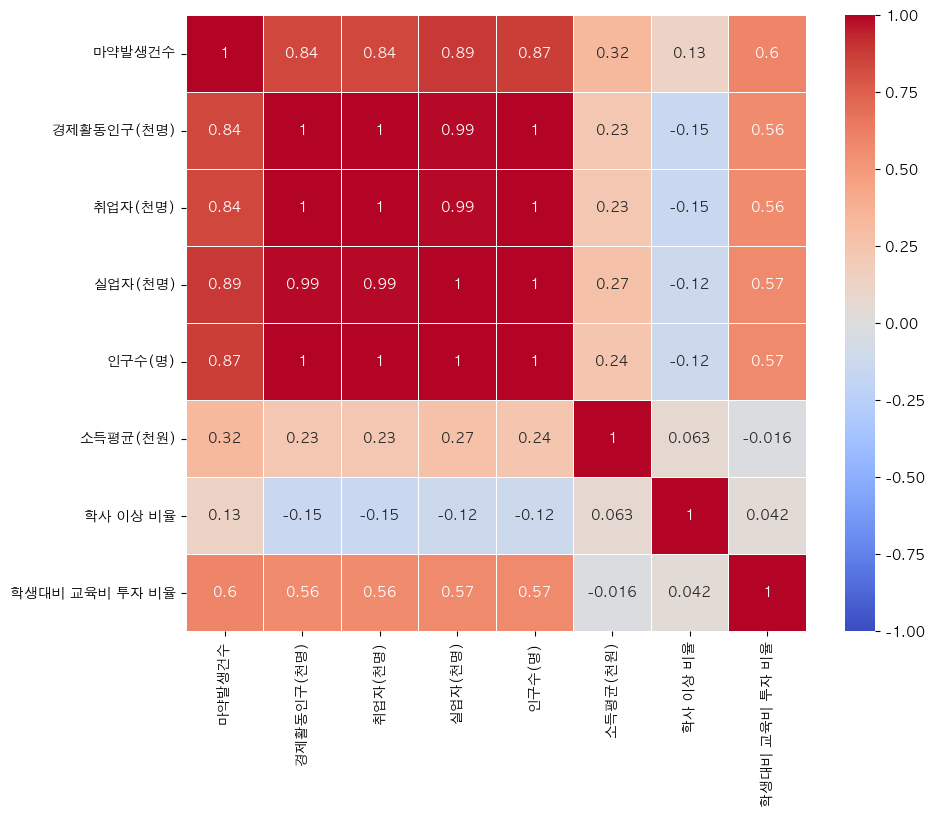

In [18]:
# 원하는 열만 선택하여 데이터프레임 생성
selected_columns = df[['마약발생건수', '경제활동인구(천명)', '취업자(천명)', '실업자(천명)', '인구수(명)',
       '소득평균(천원)', '학사 이상 비율', '학생대비 교육비 투자 비율']]

# 상관 행렬 계산
corr = selected_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.show()


### 인구 외에 교육과 관련 있을 거라 생각했으나 상관관계가 없었다.
### 인구가 많으면 마약 범죄가 많다는 기본 상식과 부합하여 같은 인구라면 어느 지역이 마약 범죄가 일어나나 확인 해보았다.
###  인구대비마약범죄율 -> 백분율

In [19]:
df['마약발생건수'] = df['마약발생건수'].astype(int)
df['인구대비마약범죄율'] = df['마약발생건수'] / df['인구수(명)'] * 100

In [20]:
df[['시도명','인구대비마약범죄율']].head()

,시도명,인구대비마약범죄율
0,강원,0.503896
1,경기,4.892269
2,경남,0.416684
3,경북,0.371766
4,광주,0.538122


In [21]:
# 경제활동인구대비범죄율 순위
top_rank = df[['시도명','인구대비마약범죄율']].sort_values(by='인구대비마약범죄율', ascending=False)
top_rank.reset_index(drop=True, inplace=True)

top_rank

,시도명,인구대비마약범죄율
0,서울,11.297869
1,부산,10.643648
2,인천,8.339759
3,경기,4.892269
4,제주,0.571765
5,울산,0.562067
6,광주,0.538122
7,충북,0.535347
8,강원,0.503896
9,충남,0.482057


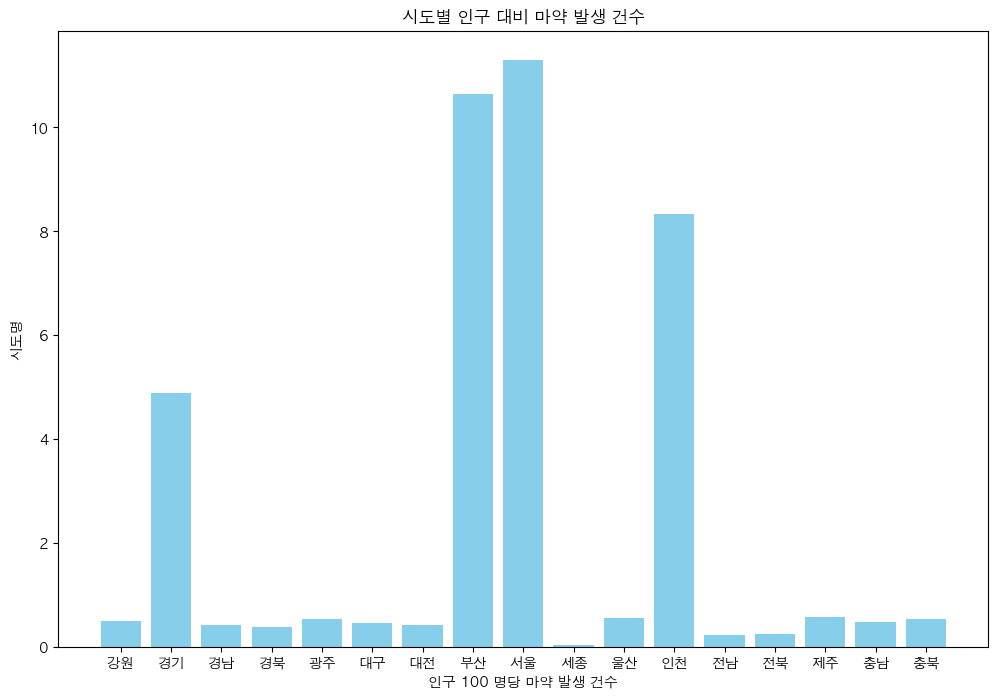

In [22]:
# 시각화
plt.figure(figsize=(12, 8))
plt.bar(df['시도명'], df['인구대비마약범죄율'], color='skyblue')
plt.xlabel('인구 100 명당 마약 발생 건수')
plt.ylabel('시도명')
plt.title('시도별 인구 대비 마약 발생 건수')
plt.show()

## 역시나 백분율로 치환해도 인구가 많이 사는 도시에 범죄의 수가 높았다.
## 방향을 틀어 마약의 유통 경로를 생각. 비행기 보다는 배로 들어올 확률이 높다. 따라서 항구의 위치와 유통량을 조사

In [23]:
port = pd.read_csv('/Users/sejinmoon/Desktop/마약과 지역의 상관관계(데이터분석)/내항화물입항현황_20240607161615.csv')
port.replace("-", 0, inplace=True)

port.head()

,구분(1),2023.04,2023.07,2023.10,2024.01,2024.04
0,부산,995539,914466,870527,987903,867095
1,인천,1471911,1455479,1547992,1719988,1822417
2,평택・당진,703725,743255,685061,643528,619025
3,경인항,9653,8675,2257,4104,18085
4,동해・묵호,84129,97365,66971,91397,64590


In [24]:
port['2024.04'] = port['2024.04'].astype(int)
port['무역량 총합'] = port['2023.04'] + port['2023.07'] + port['2023.10'] + port['2024.01'] + port['2024.04']
port.rename(columns = {'구분(1)': '시도명'}, inplace = True)
port.head()

,시도명,2023.04,2023.07,2023.10,2024.01,2024.04,무역량 총합
0,부산,995539,914466,870527,987903,867095,4635530
1,인천,1471911,1455479,1547992,1719988,1822417,8017787
2,평택・당진,703725,743255,685061,643528,619025,3394594
3,경인항,9653,8675,2257,4104,18085,42774
4,동해・묵호,84129,97365,66971,91397,64590,404452


In [25]:
port.drop(['2023.04', '2023.07', '2023.10', '2024.01', '2024.04'], axis = 1, inplace = True)
port.head()

,시도명,무역량 총합
0,부산,4635530
1,인천,8017787
2,평택・당진,3394594
3,경인항,42774
4,동해・묵호,404452


In [26]:
# 도시명을 시도명으로 매핑
city_to_region = {
    '부산': '부산',
    '인천': '인천',
    '평택・당진': '경기',
    '경인항': '경기',
    '동해・묵호': '강원',
    '삼척': '강원',
    '속초': '강원',
    '옥계': '강원',
    '대산': '충남',
    '보령': '충남',
    '호산': '경북',
    '태안': '충남',
    '군산': '전북',
    '장항': '충남',
    '목포': '전남',
    '완도': '전남',
    '여수': '전남',
    '광양': '전남',
    '포항': '경북',
    '마산': '경남',
    '삼천포': '경남',
    '옥포': '경남',
    '진해': '경남',
    '통영': '경남',
    '고현': '경남',
    '하동': '경남',
    '울산': '울산',
    '제주': '제주',
    '서귀포': '제주',
    '기타': '기타'
}

# 시도명으로 변경
port['시도명'] = port['시도명'].map(city_to_region)

port.head()

,시도명,무역량 총합
0,부산,4635530
1,인천,8017787
2,경기,3394594
3,경기,42774
4,강원,404452


In [27]:
# 시도명으로 그룹화하여 무역량 총합을 계산
grouped_port = port.groupby("시도명")["무역량 총합"].sum().reset_index()

# 결과 출력
grouped_port.head()

,시도명,무역량 총합
0,강원,823520
1,경기,3437368
2,경남,4454125
3,경북,1889071
4,기타,4663443


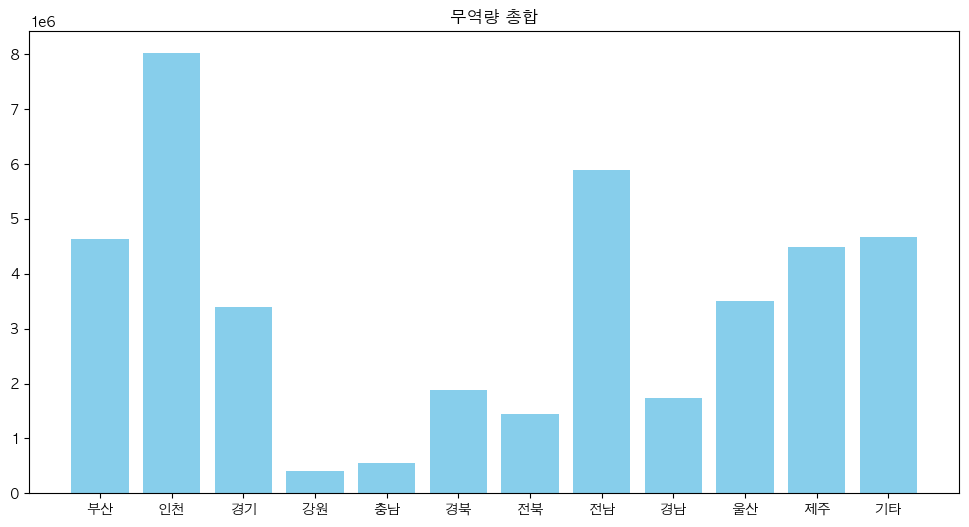

In [28]:
# 시각화
plt.figure(figsize=(12, 6))
plt.bar(port['시도명'], port['무역량 총합'], color='skyblue')
plt.title('무역량 총합')
plt.show()

## 인구 밀도 -> 밀집된 지역이면 범죄가 많이 일어날 것이라 생각

In [29]:
dense = pd.read_excel('/Users/sejinmoon/Desktop/마약과 지역의 상관관계(데이터분석)/100701_20240608145143642_excel.xlsx')
dense.head()

,통계표명:,Unnamed: 1,Unnamed: 2
0,단위:,NaN,NaN
1,NaN,인구,인구밀도
2,서울,9400,15533
3,부산,3284,4258
4,대구,2360,2666


In [30]:
dense.columns = ['시도명', '인구', '인구밀도']
dense.drop([0,1,19],axis=0, inplace = True)
dense.reset_index(drop=True, inplace=True)
dense.head()

,시도명,인구,인구밀도
0,서울,9400,15533
1,부산,3284,4258
2,대구,2360,2666
3,인천,3009,2820
4,광주,1463,2921


## 지역별 GDP 순위(경제력 판단할 객관적인 지표)

In [31]:
gdp = pd.read_csv('/Users/sejinmoon/Desktop/마약과 지역의 상관관계(데이터분석)/시도별_1인당_지역내총생산__지역총소득__개인소득_20240608152656.csv')
gdp.head()

,시도별,2022 p)
0,시도별,1인당 지역내총생산
1,울산,77511
2,충남,58937
3,서울,51612
4,전남,51422


In [32]:
gdp.columns = ['시도명', 'GDP']

In [33]:
gdp.drop([0], axis = 0, inplace = True)
gdp.reset_index(drop=True, inplace = True)

In [34]:
gdp.head()

,시도명,GDP
0,울산,77511
1,충남,58937
2,서울,51612
3,전남,51422
4,충북,48616


In [35]:
#새로운 데이터 통합
df = top_rank.merge(grouped_port, on='시도명', how='outer').merge(dense, on='시도명', how='outer').merge(gdp, on='시도명', how='outer')
df

,시도명,인구대비마약범죄율,무역량 총합,인구,인구밀도,GDP
0,서울,11.297869,NaN,9400,15533,51612
1,부산,10.643648,4635530.0,3284,4258,31611
2,인천,8.339759,8017787.0,3009,2820,35295
3,경기,4.892269,3437368.0,13781,1351,39969
4,제주,0.571765,4568412.0,677,366,31150
5,울산,0.562067,3509079.0,1106,1041,77511
6,광주,0.538122,NaN,1463,2921,30900
7,충북,0.535347,NaN,1627,220,48616
8,강원,0.503896,823520.0,1525,91,34426
9,충남,0.482057,788481.0,2204,267,58937


In [36]:
#Nan 값을 0으로 치환
df = df.fillna(0)
df.drop([17], axis = 0, inplace = True)

In [37]:
df

,시도명,인구대비마약범죄율,무역량 총합,인구,인구밀도,GDP
0,서울,11.297869,0.0,9400,15533,51612
1,부산,10.643648,4635530.0,3284,4258,31611
2,인천,8.339759,8017787.0,3009,2820,35295
3,경기,4.892269,3437368.0,13781,1351,39969
4,제주,0.571765,4568412.0,677,366,31150
5,울산,0.562067,3509079.0,1106,1041,77511
6,광주,0.538122,0.0,1463,2921,30900
7,충북,0.535347,0.0,1627,220,48616
8,강원,0.503896,823520.0,1525,91,34426
9,충남,0.482057,788481.0,2204,267,58937


In [38]:
df.columns

Index(['시도명', '인구대비마약범죄율', '무역량 총합', '인구', '인구밀도', 'GDP'], dtype='object')

In [39]:
df['인구밀도'] = df['인구밀도'].astype(int)

### 새로운 정보 들을 가지고 상관관계 분석

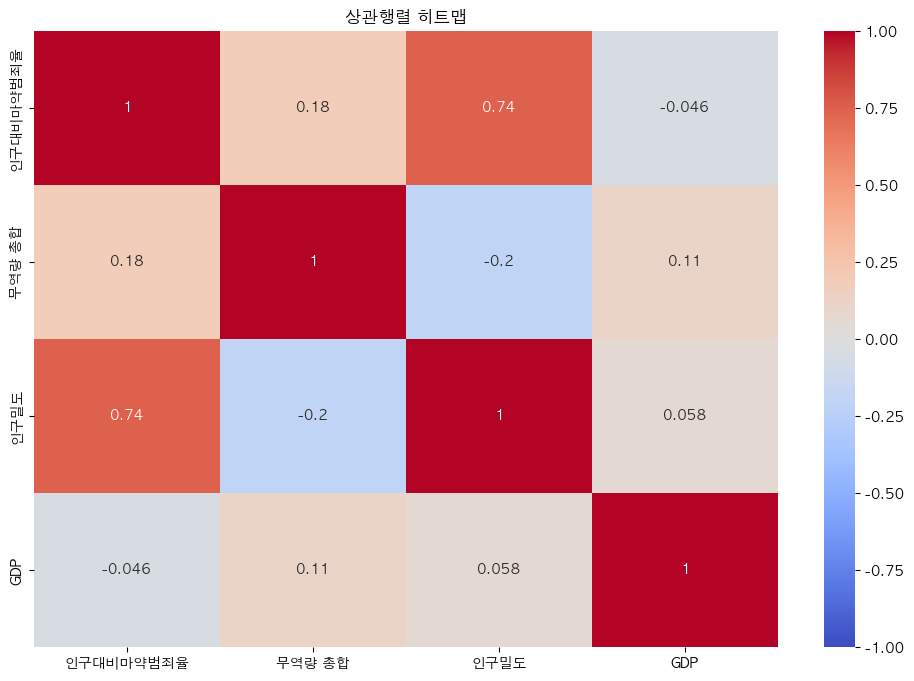

In [40]:
# 인구대비마약범죄율과 인구밀도, 무역량 총합의 관계 시각화
plt.figure(figsize=(12, 8))

# 상관행렬 히트맵
corr_matrix = df[['인구대비마약범죄율', '무역량 총합', '인구밀도', 'GDP']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('상관행렬 히트맵')
plt.show()

### 히트맵 상으로는 인구밀도 외에 관련이 없어보임
### 각 정보를 막대그래프로 시각화해서 순서 확인

/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_85288/875780850.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='인구대비마약범죄율', y='시도명', data=df_sorted, palette='viridis', ax=axes[0, 0])
/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_85288/875780850.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='무역량 총합', y='시도명', data=df_sorted, palette='viridis', ax=axes[0, 1])
/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_85288/875780850.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='인구밀도', y='시도명', 

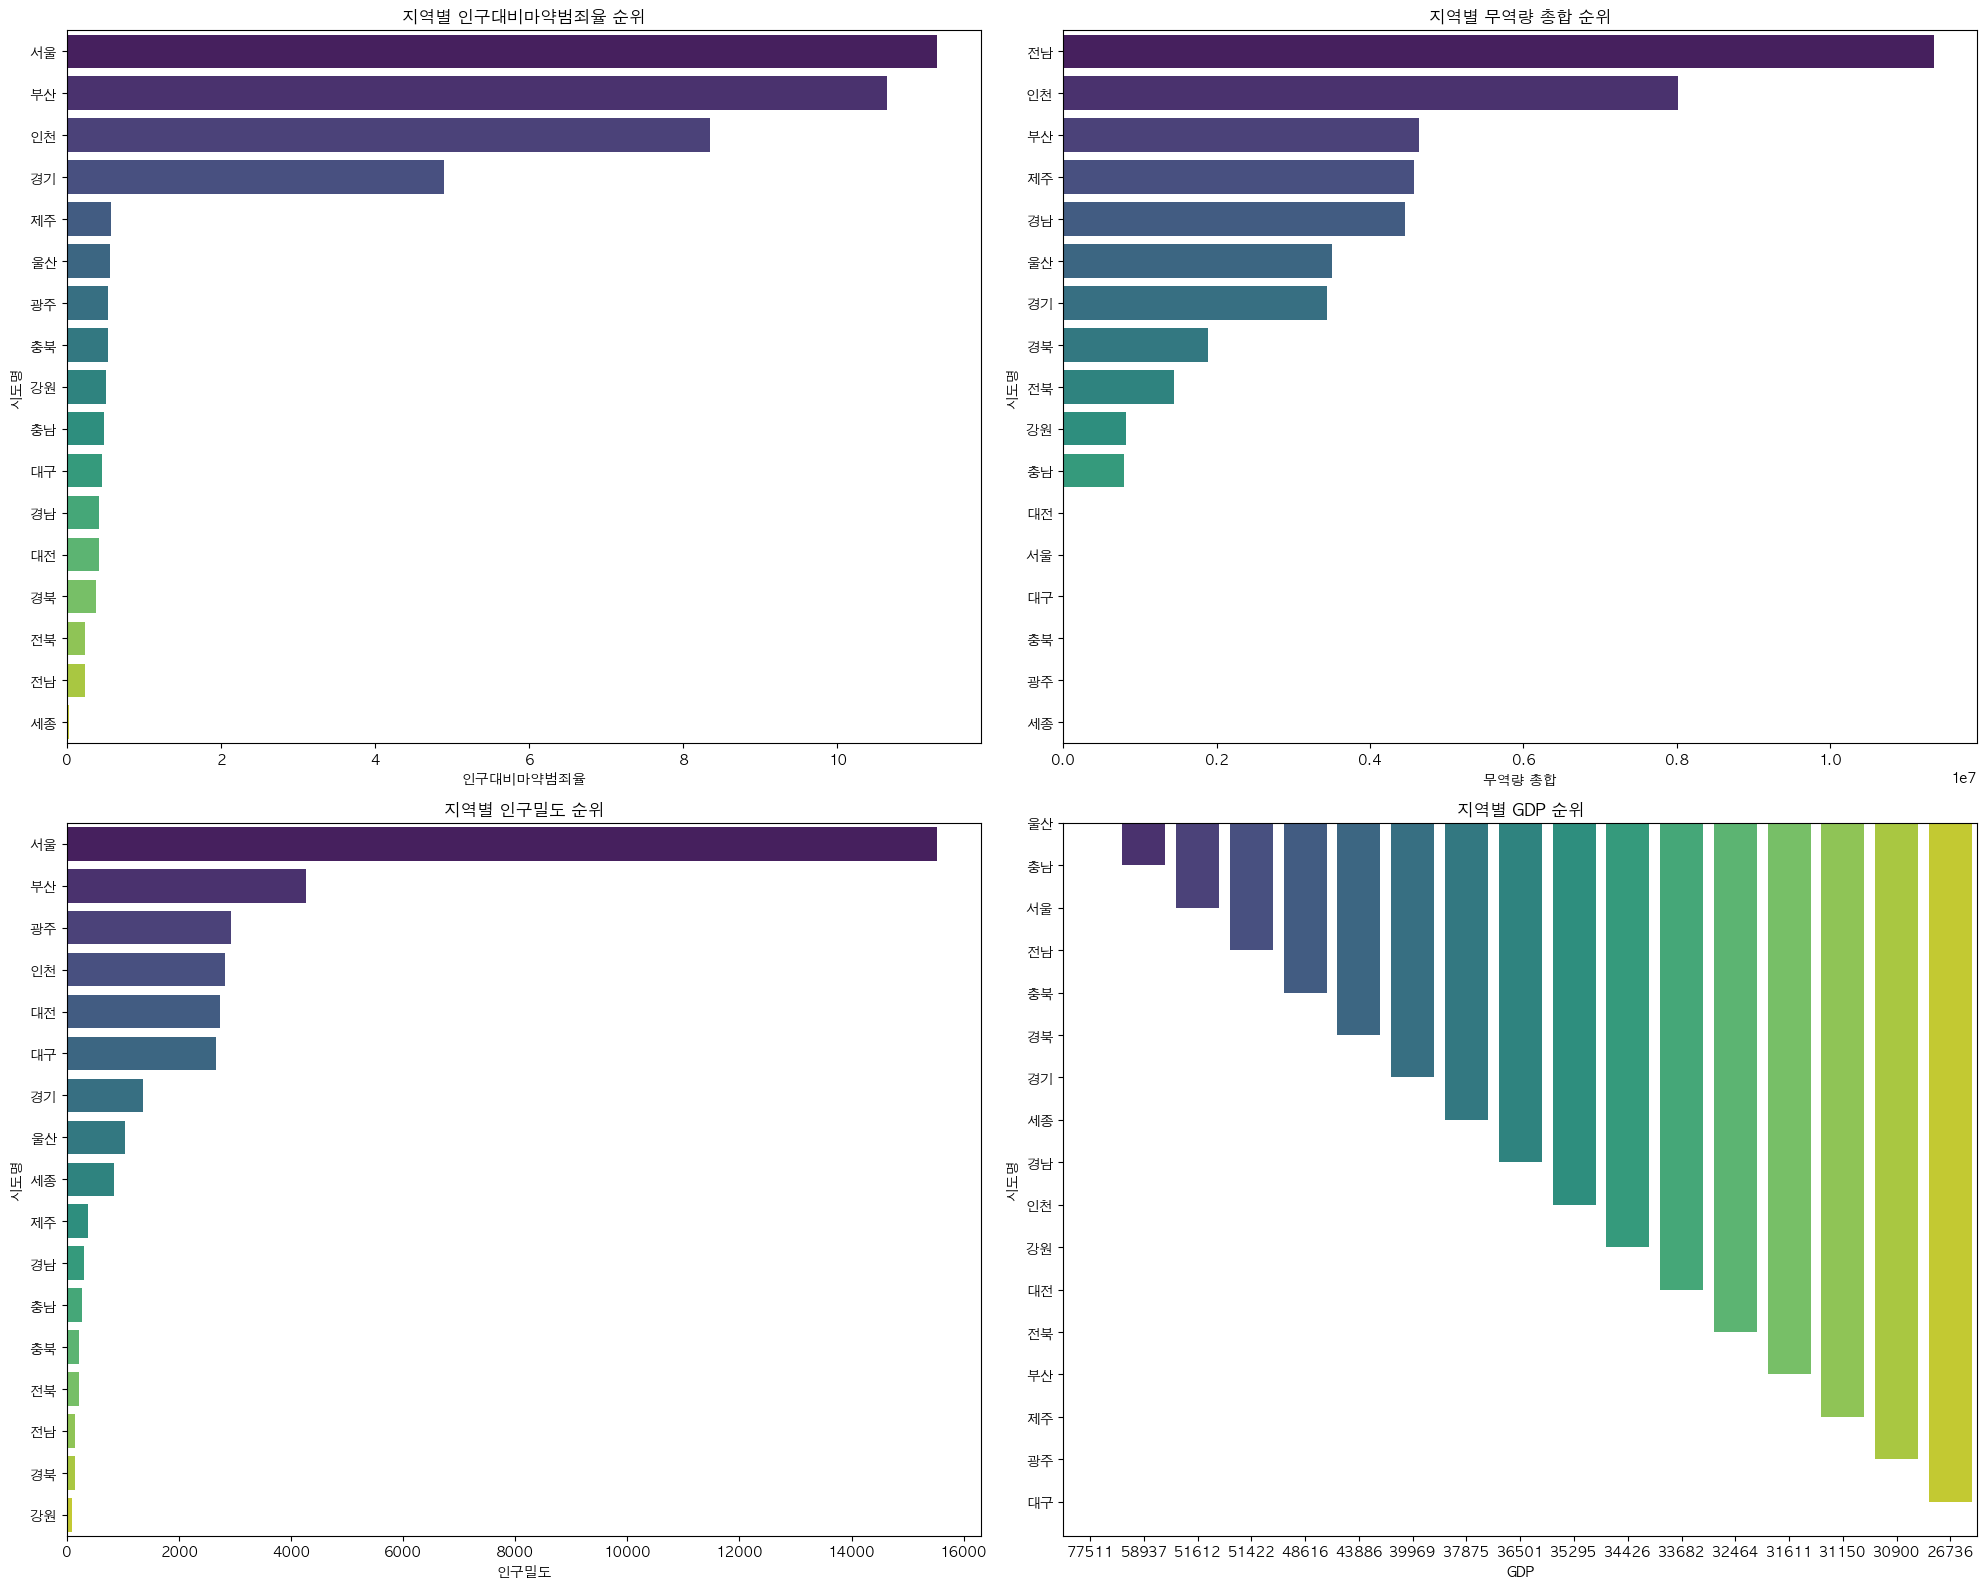

In [41]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 인구대비마약범죄율 순위 시각화
df_sorted = df.sort_values(by='인구대비마약범죄율', ascending=False)
sns.barplot(x='인구대비마약범죄율', y='시도명', data=df_sorted, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('지역별 인구대비마약범죄율 순위')
axes[0, 0].set_xlabel('인구대비마약범죄율')
axes[0, 0].set_ylabel('시도명')

# 무역량 총합 순위 시각화
df_sorted = df.sort_values(by='무역량 총합', ascending=False)
sns.barplot(x='무역량 총합', y='시도명', data=df_sorted, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('지역별 무역량 총합 순위')
axes[0, 1].set_xlabel('무역량 총합')
axes[0, 1].set_ylabel('시도명')

# 인구밀도 순위 시각화
df_sorted = df.sort_values(by='인구밀도', ascending=False)
sns.barplot(x='인구밀도', y='시도명', data=df_sorted, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('지역별 인구밀도 순위')
axes[1, 0].set_xlabel('인구밀도')
axes[1, 0].set_ylabel('시도명')

# GDP 순위 시각화
df_sorted = df.sort_values(by='GDP', ascending=False)
sns.barplot(x='GDP', y='시도명', data=df_sorted, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('지역별 GDP 순위')
axes[1, 1].set_xlabel('GDP')
axes[1, 1].set_ylabel('시도명')

# Adjust the layout
plt.tight_layout()
plt.show()

In [42]:
import statsmodels.api as sm  # statsmodels 임포트

# 데이터 타입 변환
df['인구대비마약범죄율'] = df['인구대비마약범죄율'].astype(float)
df['무역량 총합'] = df['무역량 총합'].astype(float)
df['인구'] = df['인구'].astype(float)
df['인구밀도'] = df['인구밀도'].astype(float)
df['GDP'] = df['GDP'].astype(float)

# 다중 회귀 분석
X = df[['무역량 총합', '인구', '인구밀도', 'GDP']]
y = df['인구대비마약범죄율']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              인구대비마약범죄율   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     7.976
Date:                Thu, 13 Jun 2024   Prob (F-statistic):            0.00223
Time:                        15:10:37   Log-Likelihood:                -35.612
No. Observations:                  17   AIC:                             81.22
Df Residuals:                      12   BIC:                             85.39
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6473      2.025      0.320      0.7

/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  k, _ = kurtosistest(a, axis)
